# MNIST Degit Classification

### Importing necessory Libraries

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from tensorflow import keras
import cv2
from PIL import Image


%matplotlib inline

### loading datasets from keras api


In [375]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

### checking weather target matches with image array

label : 5


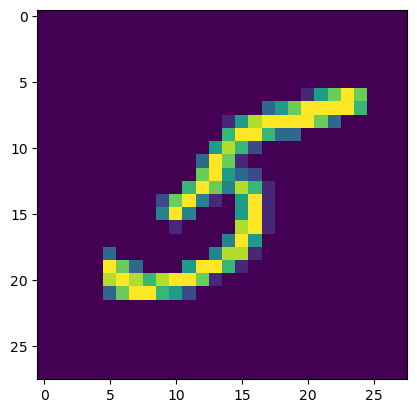

In [376]:
rand = np.random.randint(100)
print("label :",y_train[rand])
plt.imshow(X_train[rand])

In [377]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<AxesSubplot:ylabel='0'>

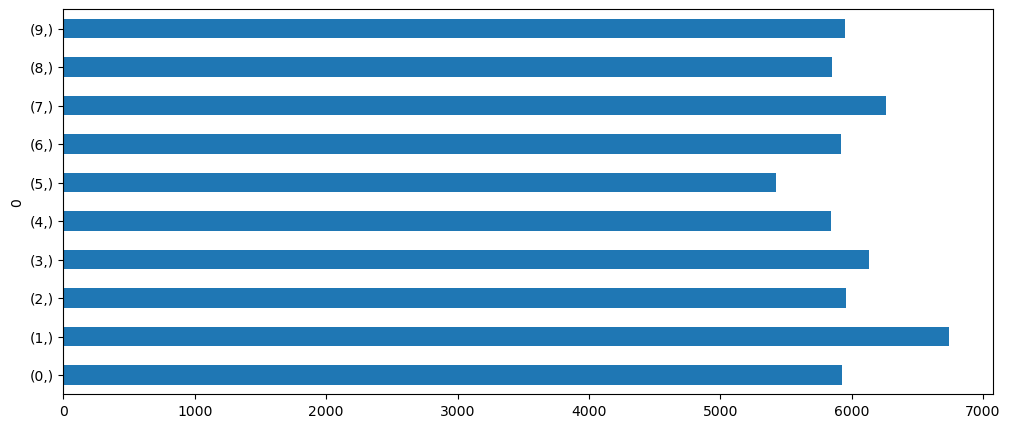

In [378]:
plt.figure(figsize=(12,5))
pd.DataFrame(y_train).value_counts().sort_index().plot(kind='barh')

### Above plot concludes classes are evenly distributed with slight variations.

### checking the dimentions of the file

In [379]:
print('Image shape: ',X_train.shape)
print('Label shape: ',y_train.shape)

Image shape:  (60000, 28, 28)
Label shape:  (60000,)


### Feature Engineering

In [380]:
print('Range before FE: ',X_train[0].min()," ---",X_train[0].max())

X_test_flattened = (X_test.reshape(len(X_test),28*28))/255
X_train_flattened = (X_train.reshape(len(X_train),28*28))/255

print('Range after FE: ',X_train_flattened[0].min(),"---",X_train_flattened[0].max(),'\n')

print('Image shape before FE: ',X_train.shape)
print('Image shape after FE: ',X_train_flattened.shape)

Range before FE:  0  --- 255
Range after FE:  0.0 --- 1.0 

Image shape before FE:  (60000, 28, 28)
Image shape after FE:  (60000, 784)


## Building the Model

In [381]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

opt = keras.optimizers.Adam()
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

model.fit(X_train_flattened,y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2080 - sparse_categorical_accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9718
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0685 - sparse_categorical_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9867


In [387]:
model.save("nn.h5")

In [388]:
ann = keras.models.load_model("nn.h5")

In [365]:
X_train_flattened[:10,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [389]:
prediction = ann.predict(X_test_flattened)
y_predicted = [np.argmax(i) for i in prediction]

313/313 [==============================] - 1s 2ms/step


Text(70.72222222222221, 0.5, 'Truth')

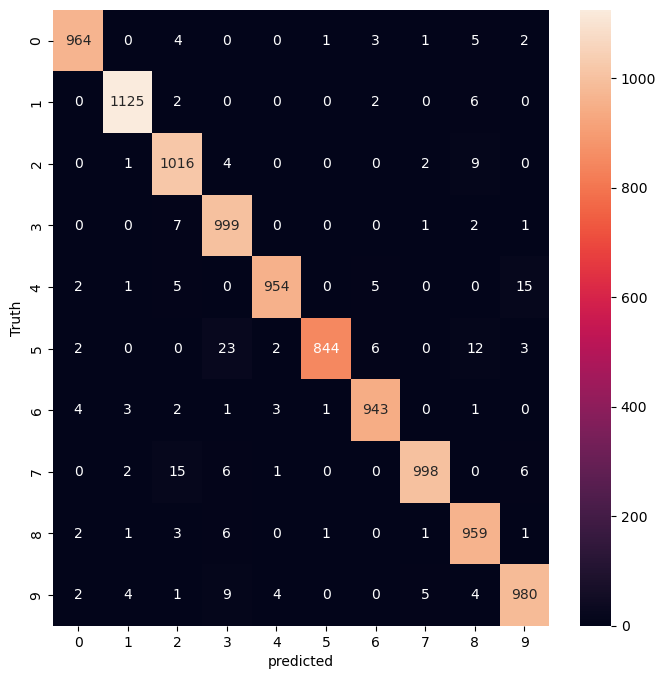

In [390]:
cm = tf.math.confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt='d' )

plt.xlabel('predicted')
plt.ylabel('Truth')